In [34]:
import kwcoco
import json
from kwcoco import CocoDataset
import skimage
from skimage import io
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [14]:
dataset = CocoDataset("./1715_all_annotations.json")
cid=1
print(dataset.cats[cid])
cid=2
print(dataset.cats[cid])
cid=3
print(dataset.cats[cid])


{'supercategory': '', 'id': 1, 'name': 'thistle'}
{'supercategory': '', 'id': 2, 'name': 'soil'}
{'supercategory': '', 'id': 3, 'name': 'crop'}


In [5]:
aid = 1
print(dataset.anns[aid])

{'segmentation': [[3010.77294921875, 1111.3174285888672, 3031.9967041015625, 1108.6644592285156, 3029.343719482422, 1099.3790588378906, 3014.089141845703, 1100.0423126220703, 3010.77294921875, 1111.3174285888672]], 'area': 186.95350167853758, 'bbox': [3010.77294921875, 1099.3790588378906, 21.2237548828125, 11.938369750976562], 'id': 1, 'attributes': {'occluded': False}, 'iscrowd': 0, 'image_id': 56, 'category_id': 1}


### Check the annotations for the 1st image in cvat

In [7]:
for i in range(491):
    file_name = dataset.imgs[i+1]["file_name"]
    if file_name=="1L_GH010068frame0156.png":
        print("img id: ", i+1)
        break
        


img id:  8


In [ ]:
dataset.imgs[8]

In [26]:
# check the annotations for crop
image_id = i+1
# print(dataset.index.gid_to_aids[image_id])
annotation_id = sorted(dataset.index.gid_to_aids[image_id])
print(annotation_id, len(annotation_id))
# print(dataset.anns[annotation_id[0]])

for aid in annotation_id:
    cid_ = dataset.anns[aid]["category_id"]
    # cid=3 for "crop" 
    if cid_==3:
        print(aid)
        break
print(dataset.anns[aid])


[300, 317, 419, 460, 4821, 4822, 4824, 4825, 4826, 5332] 10
5332
{'segmentation': [[3542.0397338867188, 1410.9114990234375, 3563.1807250976562, 1418.2014923095703, 3571.9287109375, 1426.9494934082031, 3576.302734375, 1437.8844909667969, 3578.48974609375, 1445.9034957885742, 3577.03173828125, 1453.922492980957, 3566.0967407226562, 1447.3614959716797, 3571.19970703125, 1455.3804931640625, 3576.302734375, 1459.025489807129, 3567.5547485351562, 1460.4834899902344, 3562.4517211914062, 1464.8574905395508, 3572.65771484375, 1464.1284942626953, 3577.03173828125, 1464.8574905395508, 3577.03173828125, 1475.063491821289, 3571.9287109375, 1492.5594940185547, 3577.7607421875, 1498.3914947509766, 3582.8637084960938, 1484.5404968261719, 3592.3407592773438, 1464.8574905395508, 3595.9857177734375, 1454.651496887207, 3598.9017333984375, 1443.7164916992188, 3598.9017333984375, 1434.2394943237305, 3589.4247436523438, 1449.5484924316406, 3587.9667358398438, 1442.2584915161133, 3585.7797241210938, 1435.6974

In [31]:
image = io.imread(file_name)

In [33]:
image.shape

(2160, 3840, 3)

In [45]:
segmentation = dataset.anns[aid]["segmentation"][0]
len(segmentation),segmentation[0], segmentation[1], segmentation[2], segmentation[3]

(70,
 3542.0397338867188,
 1410.9114990234375,
 3563.1807250976562,
 1418.2014923095703)

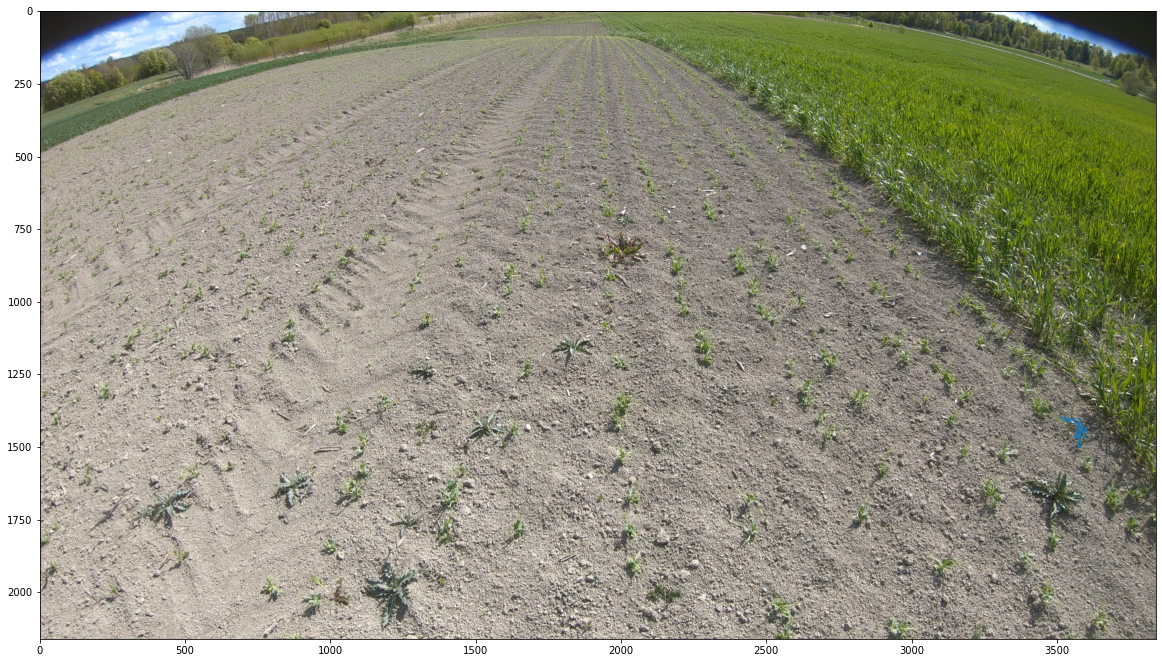

In [55]:
fig,ax = plt.subplots(1, figsize=(20,20))
ax.imshow(image)    
for i in range(0, len(segmentation), 2):
    row = segmentation[i]
    col = segmentation[i+1]
    # print(i, row, col)
    circ = Circle((row,col),5)
    ax.add_patch(circ)

![1L_GH010068frame0156.png](Screenshot-1L_GH010068frame0156.png)